<a href="https://colab.research.google.com/github/dikoharyadhanto/AI-Deep-Learning-Documentation/blob/main/SVR_Untuk_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

Support Vector Regression (SVR) menggunakan prinsip yang sama dengan SVM pada kasus klasifikasi. Perbedaannya adalah jika pada kasus klasifikasi, SVM berusaha mencari ‘jalan’ terbesar yang bisa memisahkan sampel-sampel dari kelas berbeda, maka pada kasus regresi SVR berusaha mencari jalan yang dapat menampung sebanyak mungkin sampel di ‘jalan’.

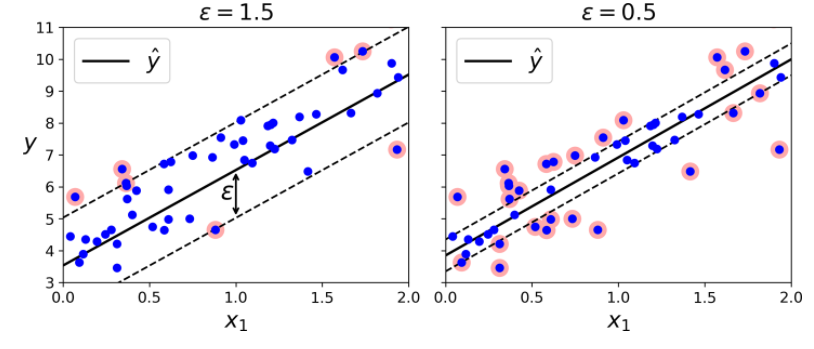

Ada dua parameter yang kita gunakan dalam model SVR, yaitu parameter ϵ yang menunjukkan margin of error dan parameter C yang merupakan parameter keteraturan atau regularization parameter.

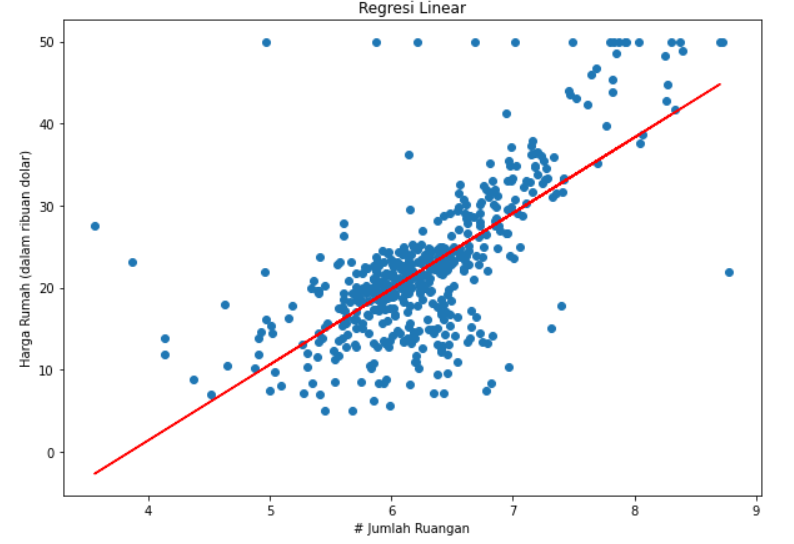

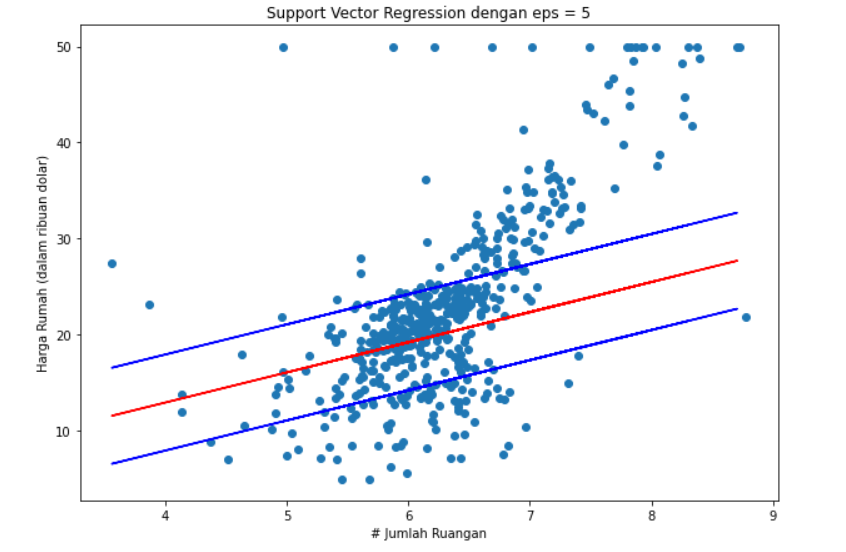

Garis merah pada gambar menunjukkan garis regresi, sedangkan garis biru menunjukkan margin dari eror, ϵ, yang telah kita atur nilainya tadi dengan ϵ = 5 (atau dalam skala ribuan berarti senilai $ 5,000). 

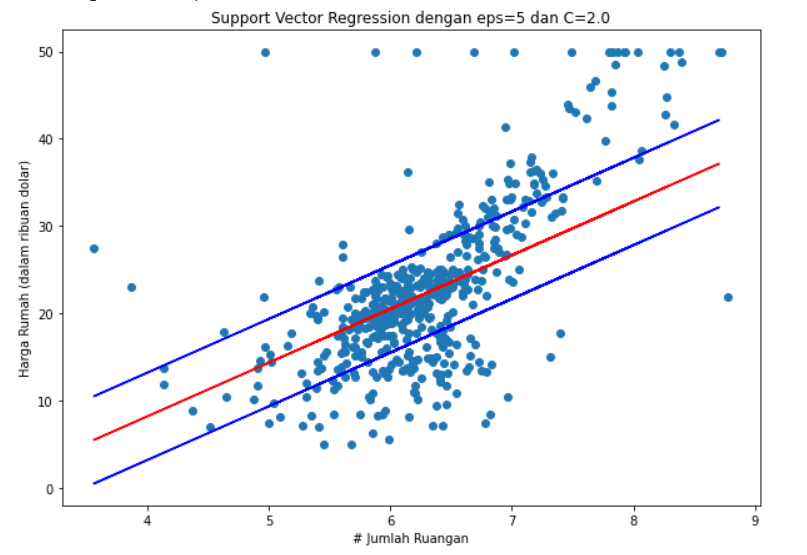

# **Latihan SKLearn SVR**

## **Membaca File Salary_Data.csv**

In [54]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [55]:
!kaggle datasets download -d karthickveerakumar/salary-data-simple-linear-regression

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/drive/MyDrive/Kaggle. Or use the environment method.


In [56]:
!unzip -q salary-data-simple-linear-regression.zip -d .

unzip:  cannot find or open salary-data-simple-linear-regression.zip, salary-data-simple-linear-regression.zip.zip or salary-data-simple-linear-regression.zip.ZIP.


In [57]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## **Mengecek Missing Value dan daftar nama kolom**

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## **Memisahkan Atribut dan Label dan mengubah bentuk Atribut**

**Notes:** Jika atributnya hanya satu. perlu diubah dulu biar bisa diterima oleh library SKLearn dengan menggunakan fungsi di Numpy

In [59]:
import numpy as np

# memisahkan atribut dan label
x = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
x = x[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


## **Membuat Objek Support Vector Regression**

In [60]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(x,y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## **Visualisasikan model SVR**

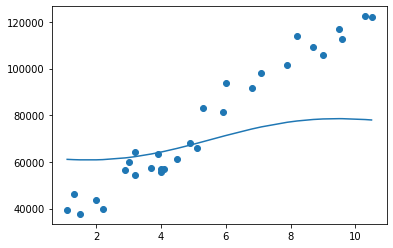

In [61]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.scatter(x,y)
plt.plot(x, model.predict(x))